# The Sequential model API

## Coding tutorials
#### [1. Building a Sequential model](#coding_tutorial_1)
#### [2. Convolutional and pooling layers](#coding_tutorial_2)
#### [3. The compile method](#coding_tutorial_3)
#### [4. The fit method](#coding_tutorial_4)
#### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu,
        input_shape=(784,)),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])
model.summary()

# Alternative way
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu,
    input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                              

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # (784, )
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Build a feedforward neural network model

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

# Build the Sequential feeforward neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu, name='layer_1'),
    tf.keras.layers.Dense(units=16, activation=tf.keras.activations.softmax),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Softmax()
])

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Build the sequential feedforward neural network model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=16, activation='relu', name='layer_1'))
model.add(tf.keras.layers.Dense(units=16, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Print the model summary
print(model.summary())

print(f"layer_1 weight shape: {model.weights[0].shape}")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
None
layer_1 weight shape: (784, 16)


***
<a id="coding_tutorial_2"></a>
## Convolution and pooling layers

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',
        input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                102464    
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 103,562
Trainable params: 103,562
Non-trainable params: 0
________________________________________________

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, 
        padding='SAME', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_16 (Dense)            (None, 64)                102464    
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 103,562
Trainable params: 103,562
Non-trainable params: 0
________________________________________________

#### Build a convolutional neural network model

In [11]:
# Build the Sequential convolutional neural network model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='SAME', strides=2, 
        activation='relu', input_shape=(1, 28, 28), data_format='channels_first'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), data_format='channels_first'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')])

# Print the model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 14, 14)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 4, 4)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                2570      
                                                                 
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='elu', input_shape=(32,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(
    # 'adam', 'rmsprop', 'adadelta'
    optimizer=tf.keras.optimizers.SGD(),
    # 'mean_squared_error', 'categorical_crossentropy'
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(), 
        tf.keras.metrics.MeanAbsoluteError()]
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,177
Trainable params: 2,177
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='elu', input_shape=(32,)),
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.001, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.7), 
        tf.keras.metrics.MeanAbsoluteError()]
)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,177
Trainable params: 2,177
Non-trainable params: 0
_________________________________________________________________


#### Compile the model

In [14]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)

[]


In [15]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.SGD(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[acc, mae])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.optimizer.lr)
print(model.metrics)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
[]


***
<a id="coding_tutorial_3"></a>
## The fit method

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='elu', input_shape=(32,)),
    tf.keras.layers.Dense(units=100, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

# X_train: (num_samples, num_features)
# y_train: (num_samples, num_classes(one-hot encoded))
model.fit(X_train, y_train)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='elu', input_shape=(32,)),
    tf.keras.layers.Dense(units=100, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# X_train: (num_samples, num_features)
# y_train: (num_samples,) (single integer for each label)
history = model.fit(X_train, y_train, epochs=10, batch_size=16)

#### Load the data

In [4]:
# Load the Fashion-MNIST dataset

(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

In [17]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [18]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(labels[train_labels[0]])

Ankle boot


In [5]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

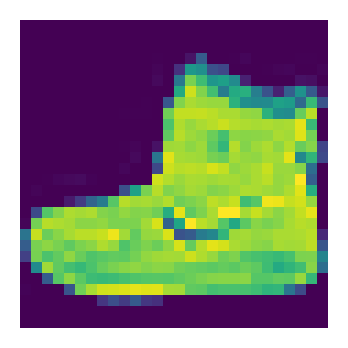

label: Ankle boot


In [23]:
# Display one of the images

i = 0
img = train_images[i, :, :]
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap='viridis')
plt.axis('off')
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Build a convolutional neural network model

In [10]:
# Build the sequential convolutional neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',
        input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


#### Compile the model

In [11]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[acc, mae])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.optimizer.lr)
print(model.metrics)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
[]


#### Fit the model

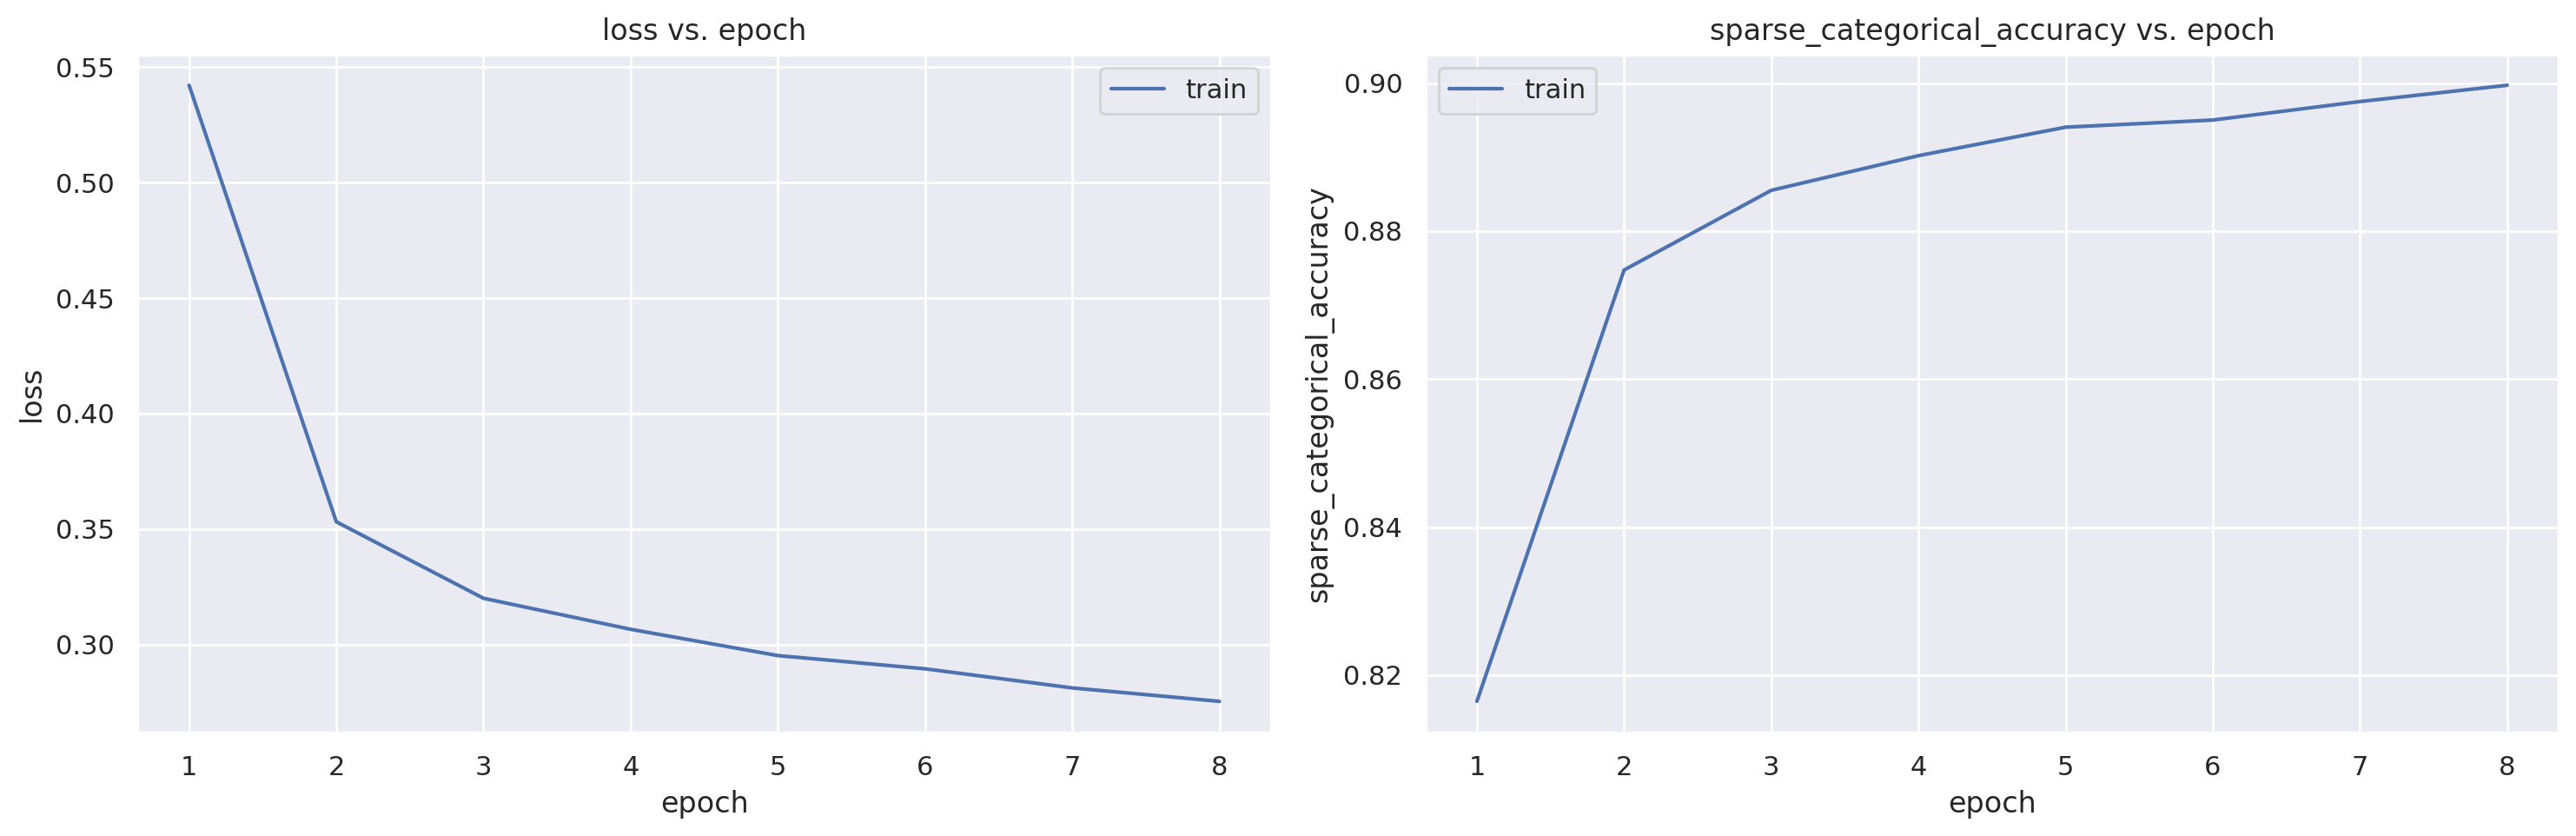

In [12]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, 
    epochs=8, batch_size=256, verbose=0)

# Plot training history
PlotHistory(history, metrics=['loss', 'sparse_categorical_accuracy']).plot()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(12,))
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(), 
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(), 
        tf.keras.metrics.MeanAbsoluteError()])
model.fit(X_train, y_train)

loss, accuracy, mae = model.evaluate(X_test, y_test)

# X_sample: (num_samples, 12)
pred = model.predict(X_sample) # (num_samples, 1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3, activation='softmax', input_shape=(12,))
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(), 
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(), 
        tf.keras.metrics.MeanAbsoluteError()])
model.fit(X_train, y_train)

loss, accuracy, mae = model.evaluate(X_test, y_test)

# X_sample: (num_samples, 12)
pred = model.predict(X_sample) # (num_samples, 3)

#### Load the data

In [13]:
# Load the Fashion-MNIST dataset

(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

In [30]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [19]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(labels[train_labels[0]])

Ankle boot


In [33]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

#### Build a convolutional neural network model

In [14]:
# Build the sequential convolutional neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',
        input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


#### Compile the model

In [15]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[acc, mae])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.optimizer.lr)
print(model.metrics)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
[]


#### Fit the model

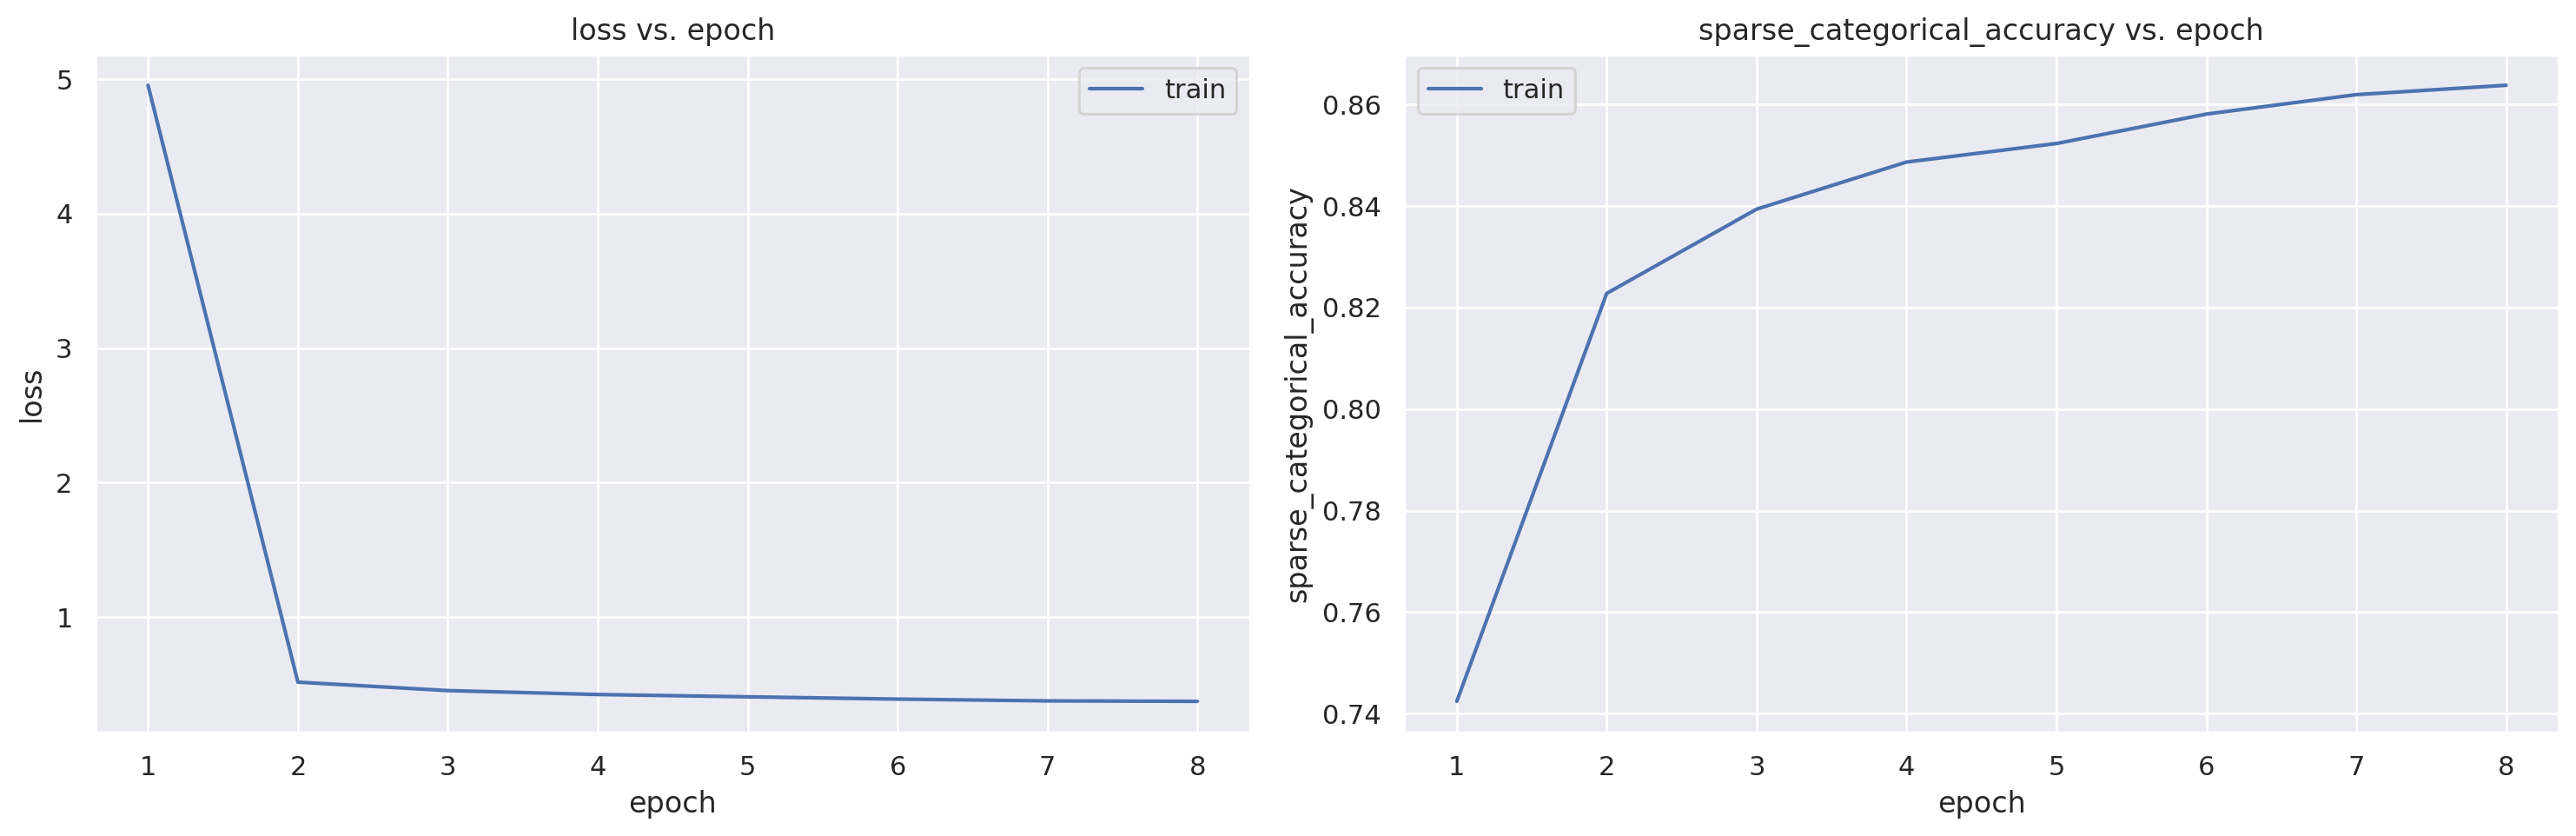

In [16]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, 
    epochs=8, batch_size=256, verbose=0)

# Plot training history
PlotHistory(history, metrics=['loss', 'sparse_categorical_accuracy']).plot()

#### Evaluate the model on the test set

In [17]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(
    test_images[..., np.newaxis], test_labels, verbose=0)

print(f"loss: {test_loss:.2f}, accuracy: {test_accuracy:.2f}, mae: {test_mae:.2f}")

loss: 0.42, accuracy: 0.85, mae: 4.42


#### Make predictions from the model

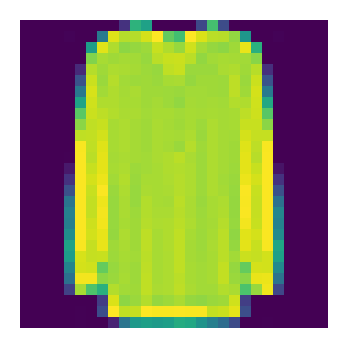

Label: Shirt


In [20]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.figure(figsize=(2, 2))
plt.imshow(test_image, cmap='viridis')
plt.axis('off')
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [21]:
# Get the model predictions

predictions = model.predict(
    test_image[np.newaxis, ..., np.newaxis], verbose=0)
print(f"Model predictions: {labels[np.argmax(predictions)]}")

Model predictions: Shirt
